In [1]:
import numpy as np

In [2]:
from numpy import linalg

In [3]:
import matplotlib.pyplot as plt

### Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

In [4]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

In [5]:
# определяем координаты точки согласно условию задачи

point = x + 2*y + 3*z
point

array([5, 7])

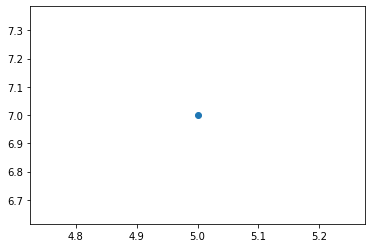

In [6]:
# строим точку

plt.scatter(point[0], point[1])

In [7]:
# косинус угла между векторами равен отношению скалярного произведения векторов
# на произведение длин этих векторов

# считаем для первой пары векторов x, y

cosine_angle_x_y = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
cosine_angle_x_y

0.7071067811865475

In [8]:
# аналогично для x, z

cosine_angle_x_z = np.dot(x, z) / (np.linalg.norm(x) * np.linalg.norm(z))
cosine_angle_x_z

0.7071067811865475

In [9]:
# проверяем на равенство значения косинусов углов (чтобы не сравнивать "глазами")
 
cosine_angle_x_y == cosine_angle_x_z

True

In [10]:
# находим значение угла между векторами в градусах
# оно равно для каждой из пар векторов

angle = np.arccos(cosine_angle_x_y) * 360 / 2 / np.pi
angle = round(angle, 2)
angle

45.0

### Задание 2

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и решение по алгоритму на бумажке). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

#### Первая матрица 2 х 2

In [11]:
m1 = np.array([[2, 2],
               [1, 3]])

In [12]:
# функция для определения собственных векторов и значений

w, v = np.linalg.eig(m1)

In [13]:
for i in range(len(w)):
    print(f'Собственное значение равно {str(w[i])}')
    print(f'ему соответствует собственный вектор {str(v[:, i])}')

Собственное значение равно 1.0
ему соответствует собственный вектор [-0.89442719  0.4472136 ]
Собственное значение равно 4.0
ему соответствует собственный вектор [-0.70710678 -0.70710678]


#### Решение по алгоритму на бумажке - в отдельном файле. Ниже - итог решения:

для собственного значения λ = 1 собственный вектор равен (-2, 1),

для собственного значения λ = 4 собственный вектор равен (1, 1).



#### Вторая матрица 3 х 3

In [14]:
m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

In [15]:
# решение в numpy - аналогичное

w_1, v_1 = np.linalg.eig(m2)

In [16]:
for i in range(len(w_1)):
    print(f'Собственное значение равно {str(w_1[i])}')
    print(f'ему соответствует собственный вектор {str(v_1[:, i])}')

Собственное значение равно 5.999999999999998
ему соответствует собственный вектор [-0.57735027 -0.57735027  0.57735027]
Собственное значение равно 2.9999999999999982
ему соответствует собственный вектор [-0.81649658  0.40824829 -0.40824829]
Собственное значение равно 2.9999999999999996
ему соответствует собственный вектор [0.15430335 0.6172134  0.77151675]


#### Решение по алгоритму на бумажке - в отдельном файле (вместе с первой матрицей). Ниже - итог решения:

для собственного значения λ = 6 собственный вектор равен (-1, -1, 1),

для собственного значения λ = 3:
    
- первый собственный вектор равен (0, 1, 1);
    
- второй - (1, 0, 1).

### Задание 3

Найдите сингулярное разложение матрицы.

In [17]:
m3 = np.array([[1, 2],
               [2, 3]])

In [18]:
# используем формулу сингулярного разложения

U, s, W = np.linalg.svd(m3)

In [19]:
U

array([[-0.52573111, -0.85065081],
       [-0.85065081,  0.52573111]])

In [20]:
W

array([[-0.52573111, -0.85065081],
       [ 0.85065081, -0.52573111]])

In [21]:
# U и W матрицы, s - вектор собственных значений исходной матрицы
s 

array([4.23606798, 0.23606798])

In [22]:
# создаем нулевую матрицу размером с исходную
# заполняем главную диагональ значениями вектора s

D = np.zeros_like(m3, dtype=float)
D[np.diag_indices(min(m3.shape))] = s
D

array([[4.23606798, 0.        ],
       [0.        , 0.23606798]])

In [23]:
# итоговая матрица сингулярно разложена на три: U, D, W
# выполним проверку, перемножив эти три матрицы

np.dot(np.dot(U, D), W)

array([[1., 2.],
       [2., 3.]])